In [2]:
import pandas as pd

In [7]:
#Carga de datos
df = pd.read_csv('defweb22.csv',  sep=';')

In [8]:
# Filtrar solo defunciones con causa X70 (suicidio)
suicidio_df = df[df["CAUSA"] == "X70"]

# Ver provincias (valores únicos de la columna PROVRES)
provincias_neumonia = suicidio_df["PROVRES"].unique()

print("Provincias con defunciones por suicidio (X70):")
print(provincias_neumonia)

conteo_provincias = suicidio_df["PROVRES"].value_counts()

print("Número de registros de defunciones por suicidio por provincia:")
print(conteo_provincias)

Provincias con defunciones por suicidio (X70):
[ 2  6 10 14 18 22 26 30 34 38 42 46 50 54 58 62 66 70 74 78 82 86 90 94
 98 99]
Número de registros de defunciones por suicidio por provincia:
PROVRES
6     31
82    30
54    27
50    27
30    27
14    26
66    25
90    24
18    23
86    22
58    21
62    20
70    20
22    19
10    19
38    19
34    18
42    18
46    16
26    16
74    15
78    15
94    10
99     6
2      3
98     2
Name: count, dtype: int64


In [10]:
# Filtrar suicidios
suicidio_df = df[df["CAUSA"] == "X70"]
conteo_provincias = suicidio_df["PROVRES"].value_counts()

# Población por provincia
poblacion = {
    2: 3075646, 6: 17541141, 10: 367828, 14: 3900000, 18: 1213242, 22: 1143201,
    26: 603120, 30: 1385965, 34: 606041, 38: 797955, 42: 366022, 46: 384607,
    50: 2062846, 54: 1237340, 58: 726590, 62: 762067, 66: 1333365, 70: 818234,
    74: 540905, 78: 337226, 82: 3397532, 86: 1060906, 90: 1694656, 94: 190641,
    98: None, 99: None
}

# Nombres de provincias
codigos_provincias = {
    2: "Ciudad Autónoma de Buenos Aires", 6: "Buenos Aires", 10: "Catamarca",
    14: "Córdoba", 18: "Corrientes", 22: "Chaco", 26: "Chubut", 30: "Entre Ríos",
    34: "Formosa", 38: "Jujuy", 42: "La Pampa", 46: "La Rioja", 50: "Mendoza",
    54: "Misiones", 58: "Neuquén", 62: "Río Negro", 66: "Salta", 70: "San Juan",
    74: "San Luis", 78: "Santa Cruz", 82: "Santa Fe", 86: "Santiago del Estero",
    90: "Tucumán", 94: "Tierra del Fuego", 98: "Sin especificar", 99: "Exterior"
}

# Crear DataFrame
df_resultado = conteo_provincias.rename("suicidios").reset_index()
df_resultado.columns = ["PROVRES", "suicidios"]
df_resultado["provincia"] = df_resultado["PROVRES"].map(codigos_provincias)
df_resultado["poblacion"] = df_resultado["PROVRES"].map(poblacion)
df_resultado["tasa_por_100k"] = (df_resultado["suicidios"] / df_resultado["poblacion"]) * 100000
df_resultado = df_resultado.round({"tasa_por_100k": 2})
df_ordenado = df_resultado.sort_values("tasa_por_100k", ascending=False)

print("Tasa de suicidios por cada 100.000 habitantes por provincia:")
print(df_ordenado[["provincia", "suicidios", "poblacion", "tasa_por_100k"]])

Tasa de suicidios por cada 100.000 habitantes por provincia:
                          provincia  suicidios   poblacion  tasa_por_100k
22                 Tierra del Fuego         10    190641.0           5.25
14                        Catamarca         19    367828.0           5.17
17                         La Pampa         18    366022.0           4.92
21                       Santa Cruz         15    337226.0           4.45
18                         La Rioja         16    384607.0           4.16
16                          Formosa         18    606041.0           2.97
10                          Neuquén         21    726590.0           2.89
20                         San Luis         15    540905.0           2.77
19                           Chubut         16    603120.0           2.65
11                        Río Negro         20    762067.0           2.62
12                         San Juan         20    818234.0           2.44
15                            Jujuy         19    7

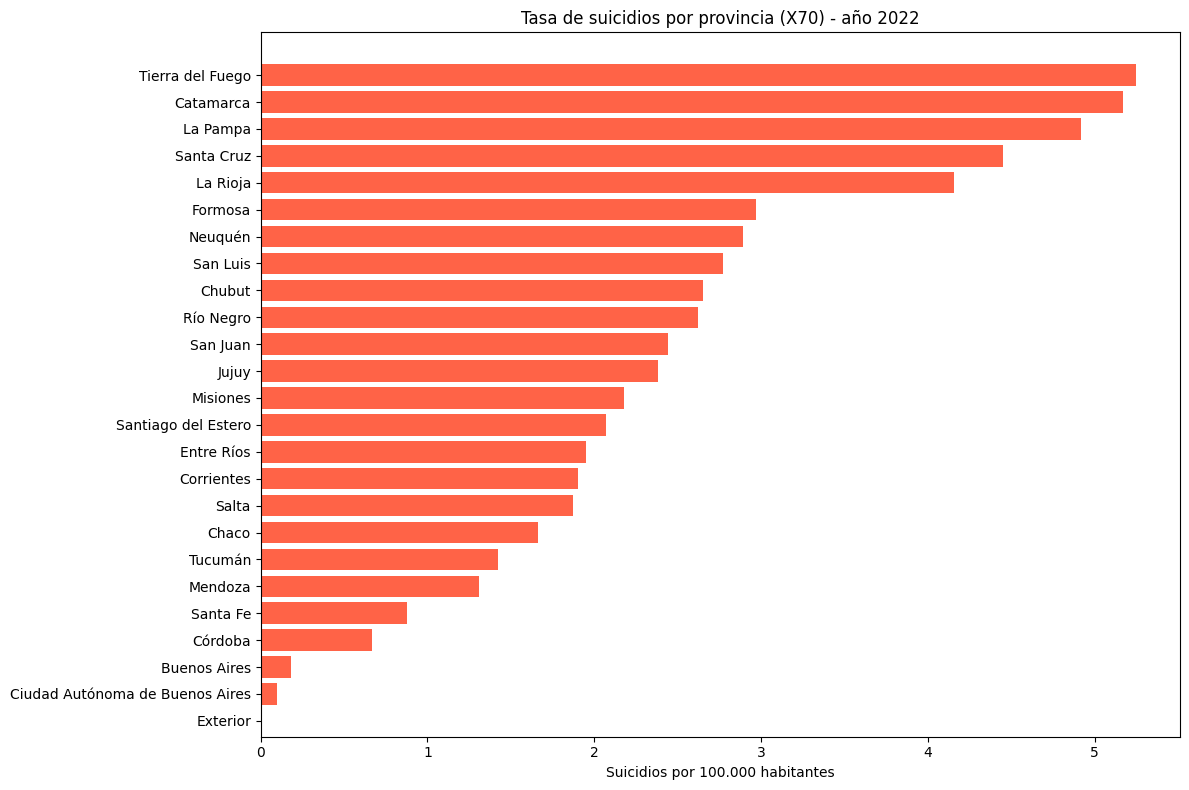

In [12]:
import matplotlib.pyplot as plt

# Este script supone que df_ordenado ya fue creado
plt.figure(figsize=(12, 8))
plt.barh(df_ordenado["provincia"], df_ordenado["tasa_por_100k"], color="tomato")
plt.xlabel("Suicidios por 100.000 habitantes")
plt.title("Tasa de suicidios por provincia (X70) - año 2022")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()